# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [24]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\cct51\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


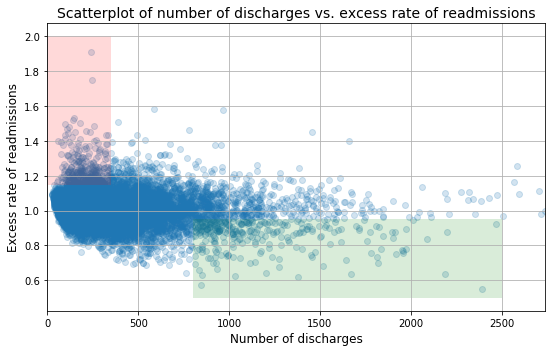

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
#A

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    perm_replicates = np.empty(size)

    for i in range(size):
        
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [6]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [7]:
more_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
less_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]

In [8]:
mean_more_1000 = more_1000['Excess Readmission Ratio'].dropna()
mean_less_100 = less_100['Excess Readmission Ratio'].dropna()

In [9]:
more_1000_set = more_1000['Excess Readmission Ratio'].dropna()
less_100_set = less_100['Excess Readmission Ratio'].dropna()

In [10]:
mean_more_1000 = np.mean(more_1000_set)
mean_less_100 = np.mean(more_1000_set)

In [11]:
overall_mean = np.mean(pd.concat((less_100, more_1000)))
emp_difference = diff_of_means(more_1000_set, less_100_set)

#Generate shifted arrays
shifted_more_1000_set = more_1000_set - np.mean(more_1000_set) + overall_mean['Excess Readmission Ratio']
shifted_less_100_set = less_100_set - np.mean(less_100_set) + overall_mean['Excess Readmission Ratio']

In [12]:
#10000 bootstrap replicates#10000 b 
bs_replicates_more = draw_bs_reps(shifted_more_1000_set, np.mean, size=10000)
bs_replicates_less = draw_bs_reps(shifted_less_100_set, np.mean, size=10000)

#Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_more - bs_replicates_less

In [13]:
emp_difference = diff_of_means(more_1000_set, less_100_set)
print(np.abs(emp_difference))

0.04428292900204345


In [14]:
#Compute and print p-value 
p = np.sum(bs_replicates >= np.abs(emp_difference)) / 10000
print('p-value =', p)

p-value = 0.0


In [ ]:

#According to the results - in a replicated, bootstrapped sample size of 10,000, none of the results 
#have a difference in the effect size as great as what we've observed. At a significance of a=0.01, 
#we can assert that there is a difference between readmission rates in cases with less than 100 discharges
#vs cases with > 1000 discharges. Hospitals with fewer discharges have more readmissions.


Report statistical significance for  αα  = .01.
Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

In [21]:
#This is the statistical significance piece of the puzzle. However, the effect size must also be examined to see that there was, 
#in fact, just a 0.44 difference between the two groups - in terms of practical significance, we can say that although there is 
#a effect here not due to chance, the question of whether it's large enough to be practically worth changing is up to debate.
#It would be misleading to claim that the p-value of 0 necessarily means that the effect size is necessarily big.

In [ ]:
#Another noticeable takeaway from the conclusions is that they immediately seek to explain the cause-and-effect behind the 
#correlation. As the most famous law of statistics states, however, 'correlation does not equal causation'. It is too early to
#immediately conclude that 'Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent 
#complications that lead to readmissions', and it is definitely too early to be basing practical recommendations on these 
#results alone.
#My recommendation to the client first would be to gather more data, before basing any policy decisions off of the issues.

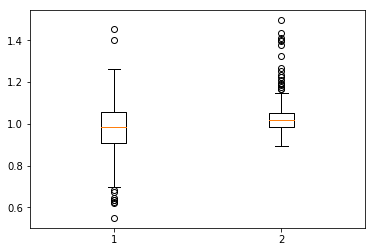

In [16]:
plt.boxplot([list(more_1000_set), list(less_100_set)])
plt.xlabel
plt.show()

In [25]:
df = clean_hospital_read_df

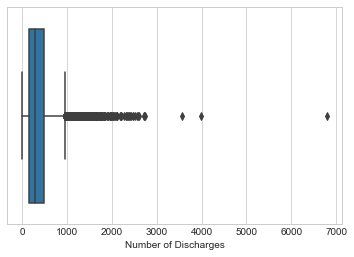

In [26]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=clean_hospital_read_df['Number of Discharges'])

In [27]:
hosp1=df[df['Excess Readmission Ratio']<=1]
hosp2=df[df['Excess Readmission Ratio']>1]

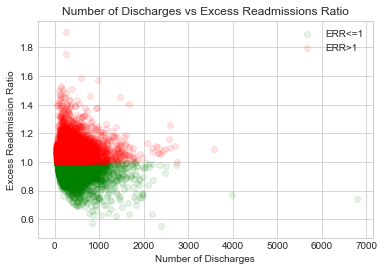

In [29]:
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

In [30]:
#Finding mean of hospital admissions stats 
P1 = 5558/(5558+5939)
P2 = 5939/(5558+5939)
print(P1, P2)

0.4834304601200313 0.5165695398799687


In [31]:
#Difference in mean of # discharges
mean_dis_diff=381.295250-350.652635
mean_dis_diff

30.642615000000035

In [32]:
# Standard deviation for difference in mean of # of discharges
std_dis_diff=np.sqrt((322.753963**2/5558) + (294.309313**2/5939))
std_dis_diff

5.772952495085433

In [34]:
# Determine using 0.05 significance level
multiplier = 1.96*std_dis_diff

## confidence interval for difference in number of discharges## confi 
conf_int = mean_dis_diff + np.array([-1, 1]) * multiplier
conf_int

array([19.32762811, 41.95760189])

In [35]:
## degrees of freedom
n1=5558
n2=5939
H1=(322.753963**2)/n1
H2=(294.309313**2)/n2

deg_freedom=((H1+H2)**2)/(((H1**2)/n1)+((H2**2)/n2))
deg_freedom

11217.039092559779

In [36]:
# t_val
t_val=(mean_dis_diff-0)/std_dis_diff
t_val

5.307962437952914

In [39]:
from scipy import stats 

p_value = stats.t.sf(np.abs(t_val), deg_freedom)*2  # two-sided pvalue
p_value

#This extremely low p-value suggests that there is a significant difference in
#the number of discharges between the two hospitals, meaning our null hypothesis
#can be rejected and we can assume there is a differentiating variable here.

1.1297252848786862e-07

In [43]:
#Q5. Advantages and Disadvantages 
#While a scatterplot does a great job of showing overall patterns within the 
#data, it lacks the acuity of lineplots and other similar graphs. One way to 
#improve upon what we started with is to add a best-fit line to the graph to
#track trends more easily.

#Start by cleaning up "Number of Discharges" and "Excess Readmission Ratio"
#Columns so they have the same # of values, then regress to add a line.

clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [48]:
#Remove nulls
clean_hospital_read_df= clean_hospital_read_df[clean_hospital_read_df['Number of Readmissions'].notnull()]

In [51]:
#Determine stats
x=clean_hospital_read_df['Number of Discharges']
y=clean_hospital_read_df['Excess Readmission Ratio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

print(slope, intercept, r_value, p_value, std_err)

-2.9010517330570697e-05 1.018106147373357 -0.09739794351079352 1.2225473776734486e-25 2.7649127349110587e-06


In [53]:
X=clean_hospital_read_df['Number of Discharges'].sort_values()
y_trend=(-2.9011e-05)*X + 1.018

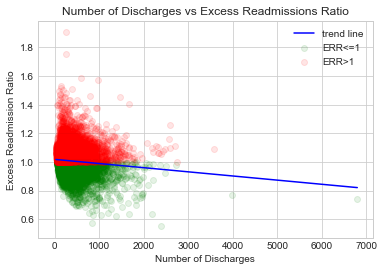

In [54]:

plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, y_trend, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()

In [17]:
np.mean(shifted_more_1000_set)
bs_replicates

array([-0.0029769 , -0.00244305,  0.00341137, ..., -0.00232915,
        0.0102734 , -0.00566648])

In [19]:
np.mean(less_100)


Provider Number               253527.829787
Number of Discharges              69.947991
Footnote                           7.000000
Excess Readmission Ratio           1.022618
Predicted Readmission Rate        20.033923
Expected Readmission Rate         19.631987
Number of Readmissions            15.930135
dtype: float64

In [20]:
np.mean(more_1000)

Provider Number               251570.626350
Number of Discharges            1383.427646
Footnote                                NaN
Excess Readmission Ratio           0.978335
Predicted Readmission Rate        16.061555
Expected Readmission Rate         16.106695
Number of Readmissions           216.192225
dtype: float64

In [ ]:
new=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
new.shape